In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("/Users/max/MasterThesis/Training/"))

In [2]:
import torch
from torch.utils.data import DataLoader, Subset, ConcatDataset, TensorDataset
from torchvision import datasets, transforms
import numpy as np

# 数据预处理
mnist34_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载 MNIST 数据集
full_train_datasets = datasets.MNIST(root="/Users/max/MasterThesisData/MNIST", train=True, transform=mnist34_transforms, download=True)
full_test_datasets = datasets.MNIST(root="/Users/max/MasterThesisData/MNIST", train=False, transform=mnist34_transforms, download=True)

# 选取标签为 3 和 4 的索引
indices3_train = [i for i in range(len(full_train_datasets)) if full_train_datasets.targets[i] == 3]
indices4_train = [i for i in range(len(full_train_datasets)) if full_train_datasets.targets[i] == 4]

indices3_test = [i for i in range(len(full_test_datasets)) if full_test_datasets.targets[i] == 3]
indices4_test = [i for i in range(len(full_test_datasets)) if full_test_datasets.targets[i] == 4]

# 获取训练集中标签为 3 和 4 的数据
mnist3_train_data = full_train_datasets.data[indices3_train]
mnist3_train_labels = torch.ones(len(indices3_train), dtype=torch.long)  # 标签 3 映射为 1 

mnist4_train_data = full_train_datasets.data[indices4_train]
mnist4_train_labels = torch.zeros(len(indices4_train), dtype=torch.long)  # 标签 4 映射为 0

# 获取测试集中标签为 3 和 4 的数据
mnist3_test_data = full_test_datasets.data[indices3_test]
mnist3_test_labels = torch.ones(len(indices3_test), dtype=torch.long)  # 标签 3 映射为 1 

mnist4_test_data = full_test_datasets.data[indices4_test]
mnist4_test_labels = torch.zeros(len(indices4_test), dtype=torch.long)  # 标签 4 映射为 0

# we can set the imbalanced ratio 0.005, 0.01, 0.02, 0.05, 0.1, 0.2
fraction = int(0.2 * len(mnist3_train_data))  ### control the fraction of the data to be used
selected_indices_4 = np.random.choice(len(mnist4_train_data), fraction, replace=False)

fraction_mnist4_train_data = mnist4_train_data[selected_indices_4]
fraction_mnist4_train_labels = mnist4_train_labels[selected_indices_4]

# 创建最终的训练和测试数据集
Final_train_data = torch.cat([mnist3_train_data, fraction_mnist4_train_data], dim=0)
Final_train_labels = torch.cat([mnist3_train_labels, fraction_mnist4_train_labels], dim=0)

Final_test_data = torch.cat([mnist3_test_data, mnist4_test_data], dim=0)
Final_test_labels = torch.cat([mnist3_test_labels, mnist4_test_labels], dim=0)

# 创建 TensorDataset
Final_train_datasets = TensorDataset(Final_train_data.unsqueeze(1).float() / 255, Final_train_labels)
Final_test_datasets = TensorDataset(Final_test_data.unsqueeze(1).float() / 255, Final_test_labels)

# 数据加载器
train_loader = DataLoader(Final_train_datasets, batch_size=64, shuffle=True)
test_loader = DataLoader(Final_test_datasets, batch_size=64, shuffle=False)

# 打印信息
print("Number of label 3 in the final training set: ", len(mnist3_train_data))
print("Number of label 4 in the final training set (after downsampling): ", len(fraction_mnist4_train_data))
print("Number of label 3 in the final test set: ", len(mnist3_test_data))
print("Number of label 4 in the final test set: ", len(mnist4_test_data))

print("Total samples in final training set: ", len(Final_train_datasets))
print("Total samples in final test set: ", len(Final_test_datasets))

print("Number of batches in training set: ", len(train_loader))
print("Number of batches in test set: ", len(test_loader))


Number of label 3 in the final training set:  6131
Number of label 4 in the final training set (after downsampling):  1226
Number of label 3 in the final test set:  1010
Number of label 4 in the final test set:  982
Total samples in final training set:  7357
Total samples in final test set:  1992
Number of batches in training set:  115
Number of batches in test set:  32


Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
First image tensor:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.00

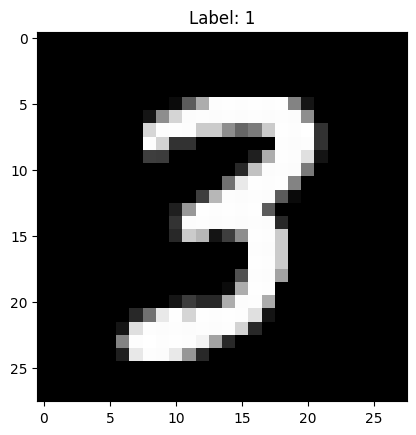

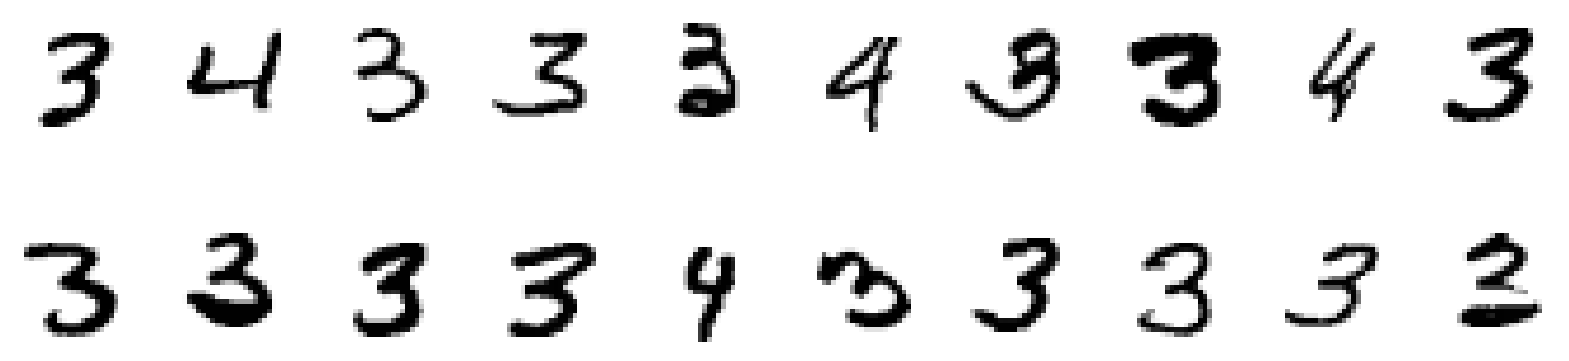

In [3]:
# 获取一个 batch
images, labels = next(iter(train_loader))

# 查看 Tensor 形状
print(f"Images shape: {images.shape}")  # 形状为 (batch_size, channels, height, width)
print(f"Labels shape: {labels.shape}")  # 形状为 (batch_size,)

# 查看第一个样本的 Tensor 值
print(f"First image tensor:\n{images[0]}")  # 打印第一个样本的 Tensor 数据
print(f"First image label: {labels[0]}")  # 打印第一个样本的标签

# 如果需要转换回 NumPy 并可视化：
import matplotlib.pyplot as plt

# 转换为 NumPy 并显示
plt.imshow(images[0].squeeze().numpy(), cmap="gray")
plt.title(f"Label: {labels[0].item()}")
plt.show()


import numpy as np

 # 指定图片大小，图像大小为20宽、5高的绘图(单位为英寸inch)
plt.figure(figsize=(20, 5)) 
for i, imgs in enumerate(images[:20]):
    # 维度缩减
    npimg = np.squeeze(imgs.numpy())
    # 将整个figure分成2行10列，绘制第i+1个子图。
    plt.subplot(2, 10, i+1)
    plt.imshow(npimg, cmap=plt.cm.binary)
    plt.axis('off')

In [ ]:
X_train = []
y_train = []

for batch in train_loader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  
        flattened_img = img.flatten()           
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img) # 
        y_train.append(label)


X_test = [] # features
y_test = [] # labels
for batch in test_loader:
    images, labels = batch  # images: (batch_size, 1,28  ,28 ), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           # flatten the image
        X_test.append(flattened_img)
        y_test.append(label)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# training model

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.naive_bayes import GaussianNB

# 创建一个Gaussian Naive Bayes分类器
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("y_pred.shape:", y_pred.shape)

from self_metrics import Binary_got_metrics
from self_metrics import Binary_got_cofusion_matrix
from self_metrics import Binary_got_metrics
TP, FP, FN, TN = Binary_got_cofusion_matrix(y_test, y_pred, labels = [1,0])


Accuracy, misclassification_rate, Sensitivity, Specificity, Precision, Negative_Predictive_Value, Gmean, Fmean, DPower, F2measure, InvF_05, AGFmeasure, Balanced_Accuracy, MCCmeasure, Kappa, Youden_Index, LR_pos, LR_neg = Binary_got_metrics(TP, FP, FN, TN)
import json

        # 构造一个包含所有指标数据的字典
metrics_dict = {
            "Number of label 3 in the final training set": len(mnist3_train_data),
            "Number of label 4 in the final training set (after downsampling)": len(fraction_mnist4_train_data),
            "Number of label 3 in the final test set": len(mnist3_test_data),
            "Number of label 4 in the final test set": len(mnist4_test_data),
            "Total samples in final training set": len(Final_train_datasets),
            "Total samples in final test set": len(Final_test_datasets),
            "Number of batches in training set": len(train_loader),
            "Number of batches in test set": len(test_loader),
            "TP": TP,
            "FP": FP,
            "FN": FN,
            "TN": TN,
            "Accuracy": round(Accuracy, 4),
            "Misclassification rate": round(misclassification_rate, 4),
            "Sensitivity (Recall)": round(Sensitivity, 4),
            "Specificity": round(Specificity, 4),
            "Precision": round(Precision, 4),
            "Negative Predictive Value": round(Negative_Predictive_Value, 4),
            "G-mean": round(Gmean, 4),
            "F-measure": round(Fmean, 4),
            "Discriminant Power (DP)": round(DPower, 4),
            "F2-measure": round(F2measure, 4),
            "InvF0.5-measure": round(InvF_05, 4),
            "AGF": round(AGFmeasure, 4),
            "Balanced Accuracy": round(Balanced_Accuracy, 4),
            "Matthew's Correlation Coefficient (MCC)": round(MCCmeasure, 4),
            "Cohen's Kappa": round(Kappa, 4),
            "Youden's Index": round(Youden_Index, 4),
            "Positive Likelihood Ratio (LR+)": round(LR_pos, 4),
            "Negative Likelihood Ratio (LR-)": round(LR_neg, 4)
        }

        # 指定 JSON 文件保存路径
metrics_results_path = f"NaiveBayesBinaryMNIST34_{fraction}_metrics_results.json"

# 将字典保存为 JSON 文件
with open(metrics_results_path, "w") as f:
    json.dump(metrics_dict, f, indent=4)

X_train.shape: (7357, 784)
y_train.shape: (7357,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 646
FP: 18
FN: 364
TN: 964
Accuracy: 0.8082
Misclassification rate: 0.1918
Sensitivity (Recall): 0.6396
Specificity: 0.9817
Precision: 0.9729
Negative Predictive Value: 0.7259
G-mean: 0.7924
F-measure: 0.7718
Discriminant Power: 2.5110
F2-measure: 0.8811
InvF0.5-measure: 0.6866
AGF: 0.7778
Balanced Accuracy: 0.8106
Matthew's Correlation Coefficient: 0.6589
Cohen's Kappa: 0.6183
Youden's Index: 0.6213
Positive Likelihood Ratio: 34.8939
Negative Likelihood Ratio: 0.3671
